In [97]:
___Author___='LumberJack Jyss'

In [98]:
print('Global Optimized LumberJack Equities Method\n°OoO_TRENDLINE_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_TRENDLINE_Oo0°
LumberJack Jyss 5779(c)


In [99]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import pandas
from sklearn.linear_model import LinearRegression
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [100]:
# SCRAPING DES DONNES BRUTES
eurusd = pd.read_csv('eurusd_15mn_1Y.csv')
eurusd = eurusd.set_index('Date')
eurusd = eurusd.iloc[:-2,1:-1]

In [101]:
df = eurusd.iloc[-97:-5,:]
df.shape

(92, 4)

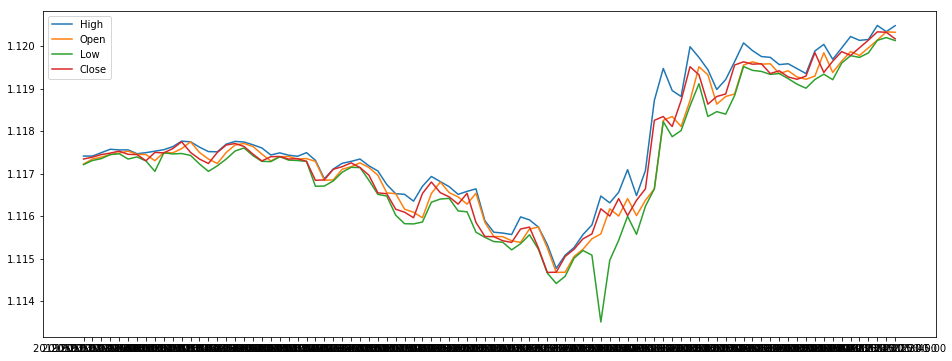

In [102]:
plt.figure(figsize=(16,6))
plt.plot(df['High'])
plt.plot(df['Open'])
plt.plot(df['Low'])
plt.plot(df['Close'])
plt.legend()

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


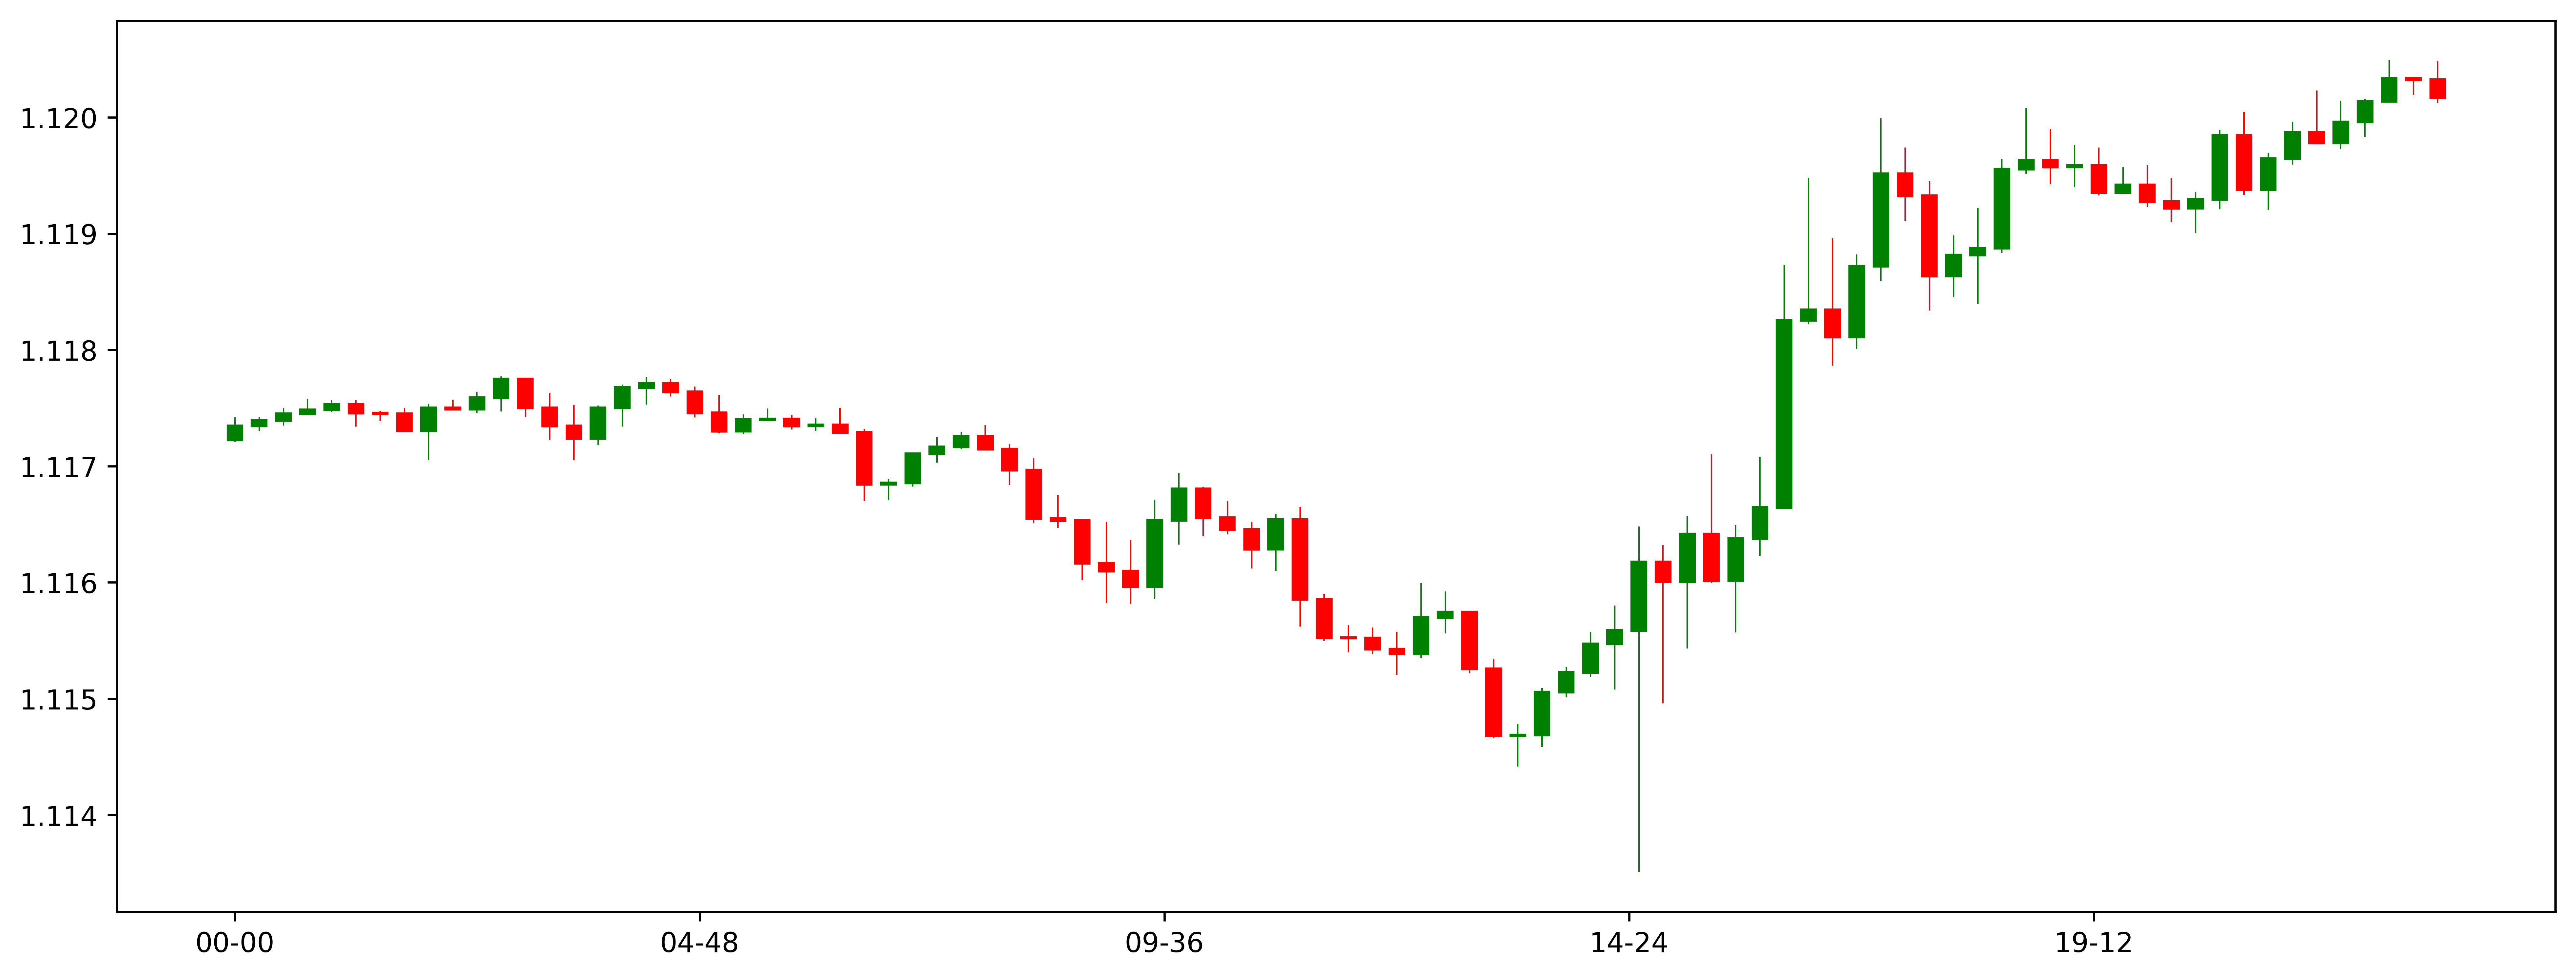

In [103]:
date_index = df.index
date = pd.to_datetime(date_index)
df.loc[:,'Date'] = date
df.loc[:,"Date"] = df["Date"].apply(mdates.date2num)
ohlc= df[['Date', 'Open', 'High', 'Low','Close']].copy()
f1, ax = plt.subplots(figsize = (16,6),dpi=600)
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

In [104]:
df.head()

,Open,High,Low,Close,Date
Date,,,,,
20190503 00:00:00,1.117225,1.117415,1.117215,1.117345,737182.000000
20190503 00:15:00,1.117345,1.117415,1.117310,1.117390,737182.010417
20190503 00:30:00,1.117390,1.117495,1.117355,1.117450,737182.020833
20190503 00:45:00,1.117450,1.117575,1.117450,1.117485,737182.031250
20190503 01:00:00,1.117485,1.117560,1.117470,1.117530,737182.041667


In [139]:
high_max_list = []
low_max_list = []
date_high = []
date_low = []
high_max = df.iloc[0,1]
low_max = df.iloc[0,2]
plot_high =[]
plot_low = []


for row in range(0,df.shape[0]-1):
    
    if df.iloc[row,1] > high_max:
        high_max = df.iloc[row,1]
        high_max_list.append(high_max)
        date_high.append(df.iloc[row,4])
        plot_high.append((df.iloc[row,4],df.iloc[row,1]))
    
    if df.iloc[row,2] < low_max:
        low_max = df.iloc[row,2]
        low_max_list.append(low_max)
        date_low.append(df.iloc[row,4])
        plot_low.append((df.iloc[row,4],df.iloc[row,2]))
    

In [140]:
len(plot_high),len(date_high),len(plot_low),len(date_low)

(10, 10, 15, 15)

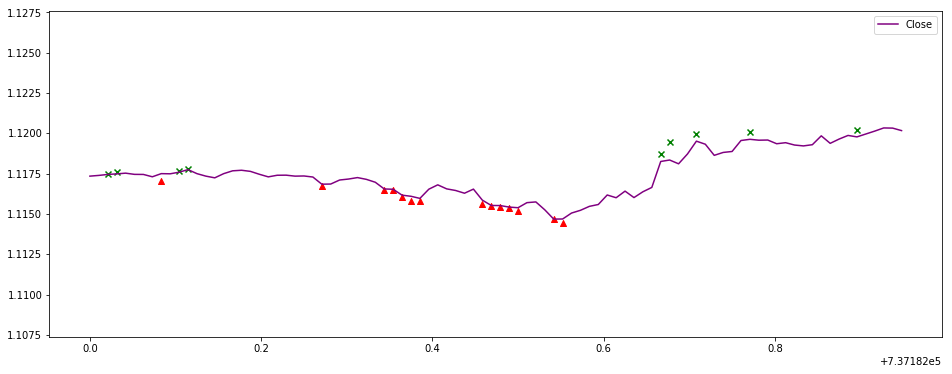

In [129]:
plt.figure(figsize=(16,6))
for i in range(0,len(plot_high)-1):
    plt.scatter(plot_high[i][0],plot_high[i][1],c='g',marker = 'x')
for i in range(0,len(plot_low)-1):
    plt.scatter(plot_low[i][0],plot_low[i][1],c='r',marker='^')
plt.plot(df['Date'],df['Close'],color='purple')
plt.legend()

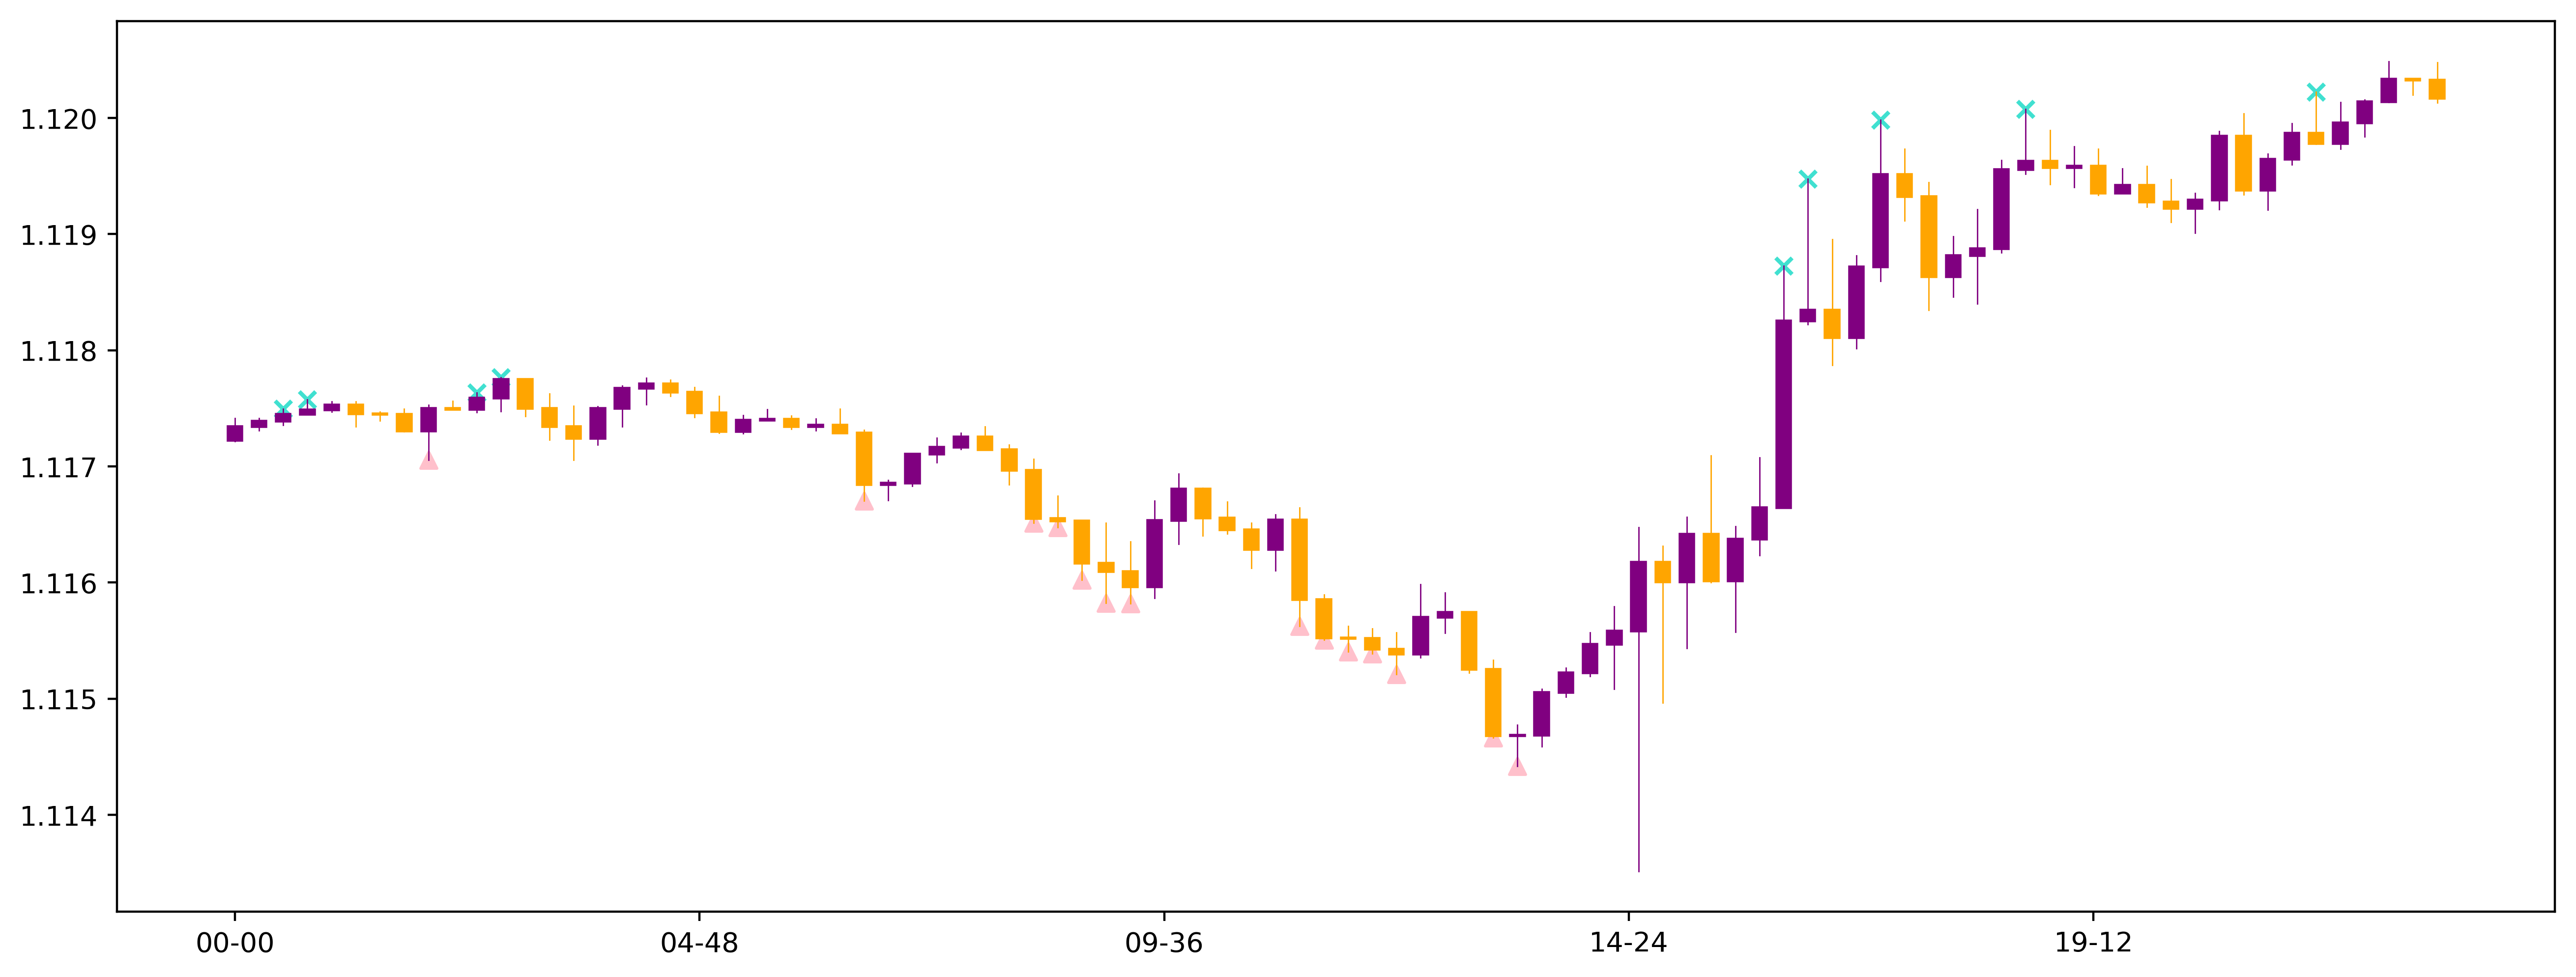

In [145]:
f1, ax = plt.subplots(figsize = (16,6),dpi=400)

for i in range(0,len(plot_high)-1):
    plt.scatter(plot_high[i][0],plot_high[i][1],c='turquoise',marker = 'x')
for i in range(0,len(plot_low)-1):
    plt.scatter(plot_low[i][0],plot_low[i][1],c='pink',marker='^')
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))


In [156]:
high_X = []
high_y = []
for i in range(0,len(plot_high)-1):
    high_X.append(plot_high[i][0])
    high_y.append(plot_low[i][1])

In [159]:
low_X = []
low_y = []
for i in range(0,len(plot_low)-1):
    low_X.append(plot_low[i][0])
    low_y.append(plot_low[i][1])

ValueError: x and y must have same first dimension, but have shapes (92,) and (9,)

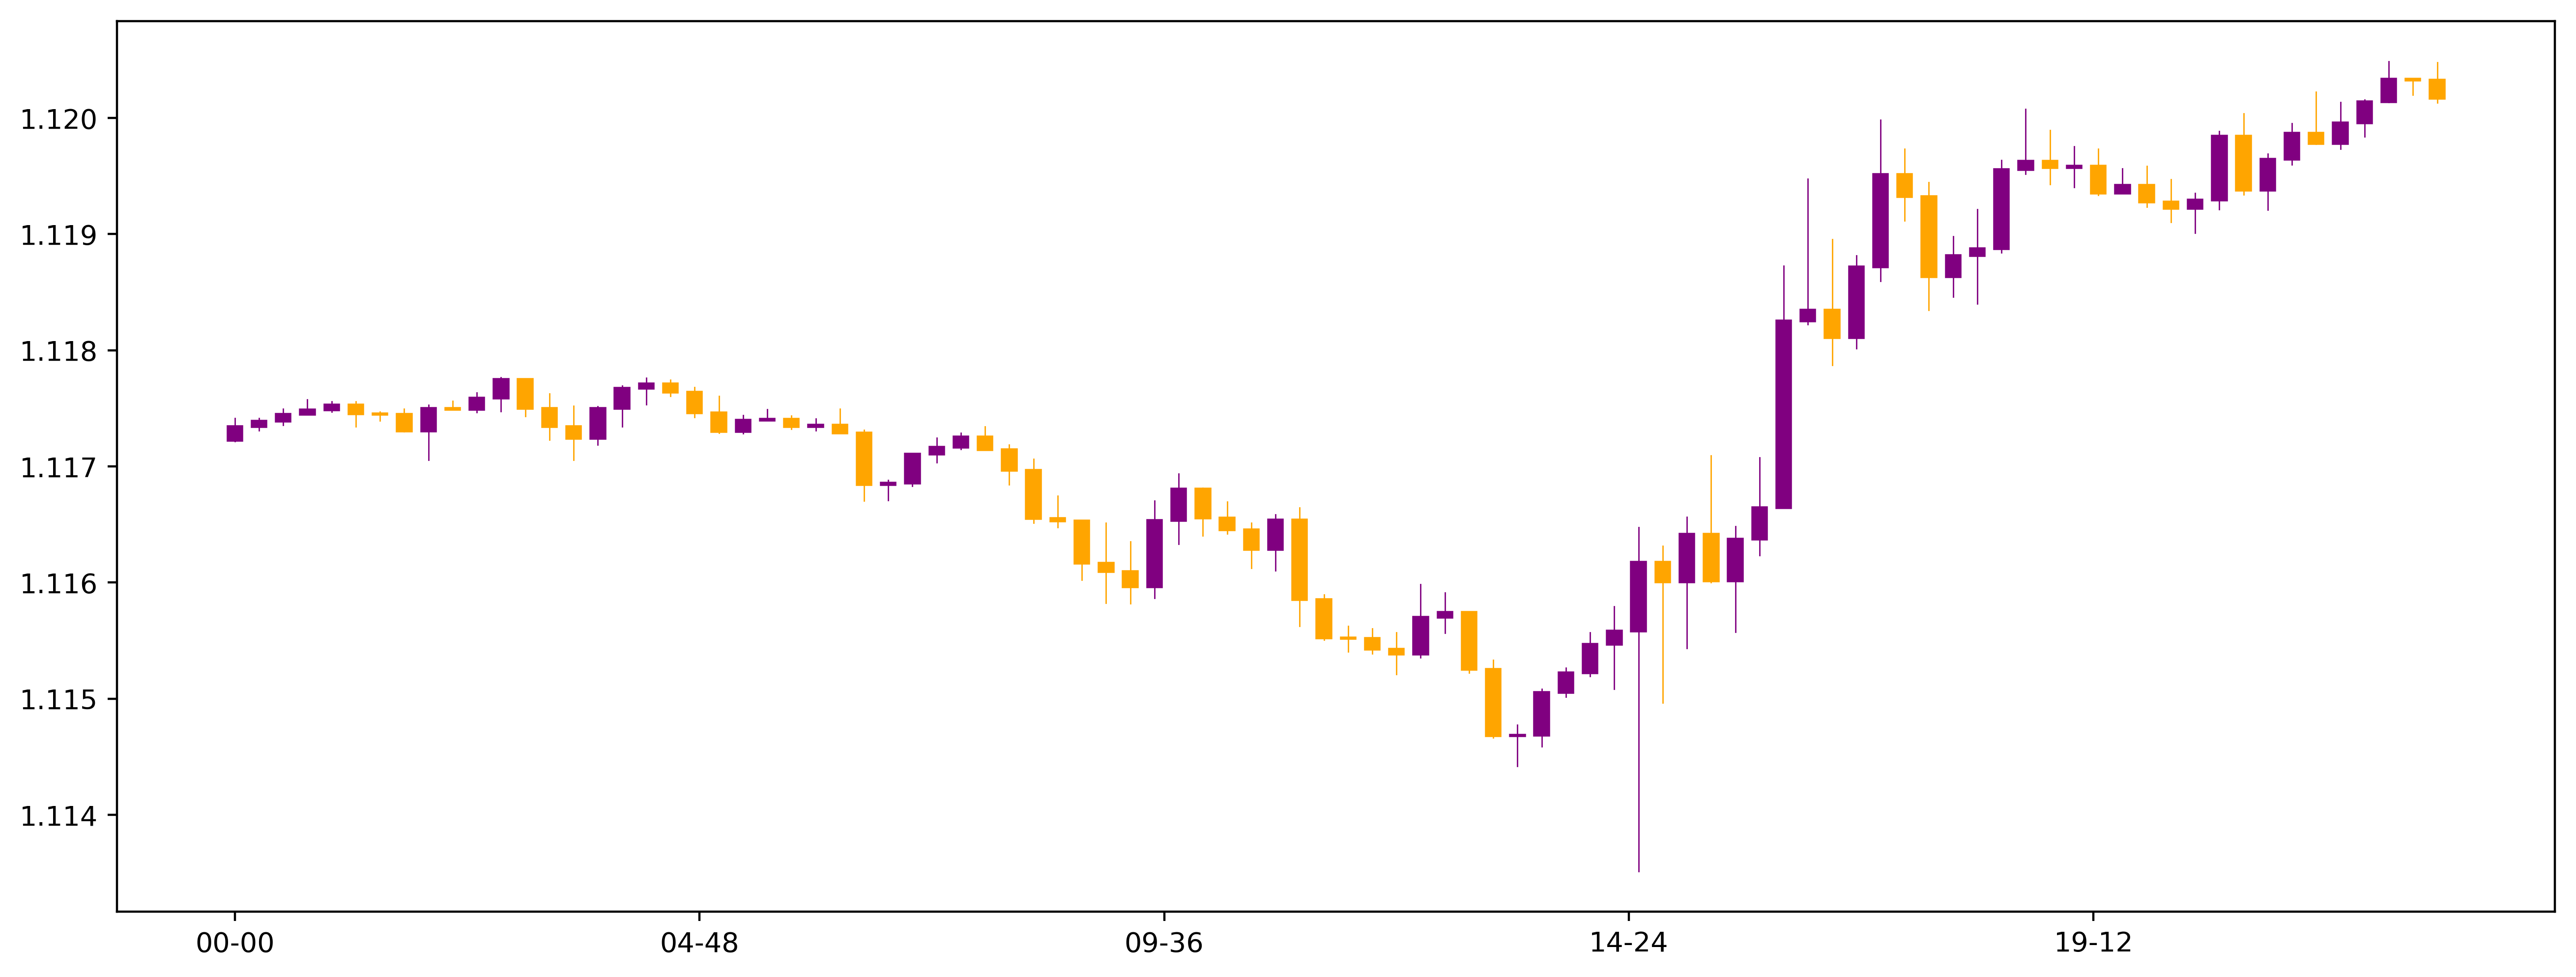

In [165]:
# fit linear model
X = high_X
X = np.reshape(X, (len(X), 1))
y = high_y
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
f1, ax = plt.subplots(figsize = (16,6),dpi=400)
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
plt.plot(df['Date'],trend)



In [164]:
trend

array([1.1167698 , 1.11675506, 1.11665192, 1.11663718, 1.11585624,
       1.11584151, 1.11579731, 1.1157089 , 1.11553208])

In [87]:
df = df.iloc[:,:-1]
df.head()

,Open,High,Low,Close
Date,,,,
20190503 00:00:00,1.117225,1.117415,1.117215,1.117345
20190503 00:15:00,1.117345,1.117415,1.117310,1.117390
20190503 00:30:00,1.117390,1.117495,1.117355,1.117450
20190503 00:45:00,1.117450,1.117575,1.117450,1.117485
20190503 01:00:00,1.117485,1.117560,1.117470,1.117530
